<a href="https://colab.research.google.com/github/khalilullahalfaath/tubes01AI/blob/main/AI_TubesKelompok_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA KELOMPOK : KHALILULLAH AL FAATH; MIRAI TSUCHIYA

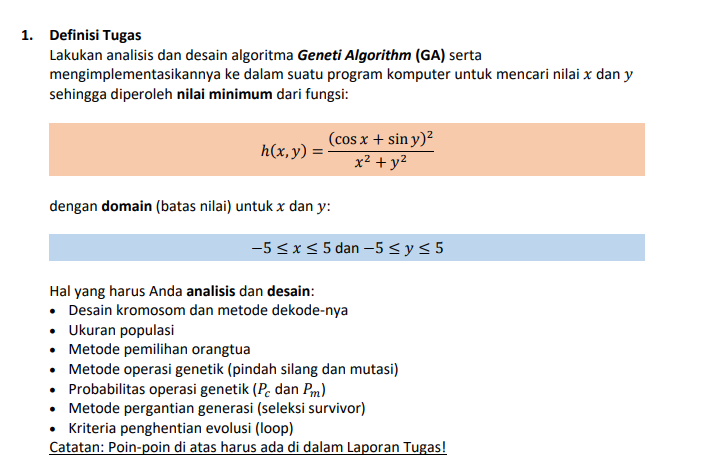

In [ ]:
#importing libraries that will be used later
import random
from math import sin,cos

#Initializing domain of x and y based on the assignment
limitX = [-5,5]
limitY = [-5,5]

#Initializing the mutation probability and recombination probability
recombinationProbability = 0.8
mutationProbability = 0.05

#initializing the generation total, population total (individu total), and chromosome length
generation = 100
individuTotal = 10
chromosomeLength = 10

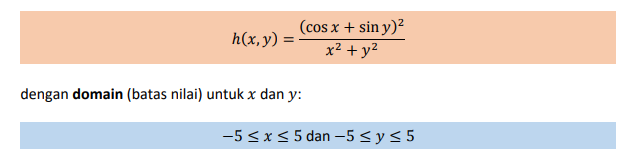

In [ ]:
#initializing the function that will be minimized using genetics algorithm
def h(x,y):
  return ((cos(x)+sin(y))**2) / ((x**2)+(y**2))

In [ ]:
#function to generate population including its chromosomes
def generatePopulation(populationSize,chromosomeLength):
  #binary representation
  return ([[random.randint(0,1) for _ in range(chromosomeLength)] for _ in range(populationSize)])

In [ ]:
#function to split a chromosome into two pieces that will be called as phenotypes
def splitChromosome(chromosome):
  split = len(chromosome) // 2
  return chromosome[:split], chromosome[split:]

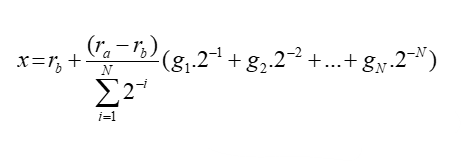

Binary representation formula



In [ ]:
#function to decode every chromosomes in population
#binary representation
def decode(chromosome,limit):
  multiplier,divider = 0, 0
  for i in range(len(chromosome)):
    genotype = chromosome[i]
    multiplier += (genotype * (2**-(i+1)))
    divider += (2**-(i+1))
  return limit[0]+(((limit[1]-limit[0])/divider)*multiplier)

In [ ]:
#this function will return fitness value of a chromosome
def fitnessFunction(x1,x2):
  #a is a very small number to avoid zero division
  a = 0.001

  #fitness = 1/(h+a)
  return 1/(a+h(x1,x2))

In [ ]:
#this function will return a parent to generate a new generation in the mating pool
def parentRouletteWheel(population, fitness, fitnessTotal):
  r = random.random() #select random betwwen 0 and 1 (inclusive)
  i = 0
  while r > 0: #r will be reduced for every fitness value of a chromosome
    r -= fitness[i]/fitnessTotal
    i += 1
    if i == len(population) - 1:
      break
  return population[i]

In [ ]:
#this function will return a parent to generate a new generation in the mating pool
def parentStochasticRouletteWheel(population,maxFitness):
  while(True):
    individu = random.uniform(0,1)*individuTotal
    chromosomeIndividu = population[int(individu)]
    
    firstGenotype,secondGenotype = splitChromosome(chromosomeIndividu)
    x1 = decode(firstGenotype,limitX)
    x2 = decode(secondGenotype,limitY)
    
    r = random.uniform(0,1)
    if r < (fitnessFunction(x1,x2)/maxFitness):
      return chromosomeIndividu

In [ ]:
print(random.uniform(0,1))

0.39414573992505086


In [ ]:
#this function will return the best chromosome in a population. This is a common function to find the max value of an array
def bestChromosomeSelection(population):
  maxFitness = -999 # a very small number

  for chromosome in population: #looping for every chromosome in a population
    firstGenotype,secondGenotype = splitChromosome(chromosome)
    x1 = decode(firstGenotype,limitX)
    x2 = decode(secondGenotype,limitY)
    fitness = fitnessFunction(x1,x2)

    if maxFitness < fitness:
      maxFitness = fitness
      maxChromosome = chromosome
  
  firstGenotype,secondGenotype = splitChromosome(maxChromosome)
  x1,x2 = decode(firstGenotype,limitX), decode(secondGenotype,limitY)
  return maxChromosome,maxFitness,x1,x2 #return the maxChromosome, it's fitness, and it's Genotypes

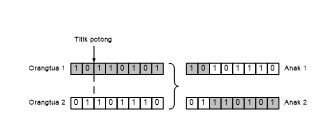

Recombination illustration

In [ ]:
#recombination using single point crossover
def recombination(firstParent,secondParent):
  r = random.random() #random number [0,1]
  firstChild,secondChild = [],[] #Every two parents will generate two children

  if r < recombinationProbability:
    point = random.randint(1,len(firstParent)-1) #select random point from index 1 to the second last gen in a chromosome
    firstChild = firstParent[:point] + secondParent[point:]
    secondChild = secondParent[:point] + firstParent[point:]
  else: #if the random r bigger than recombination probability, the children will be same as their parents
    firstChild = firstParent
    secondChild = secondParent
  
  return firstChild,secondChild

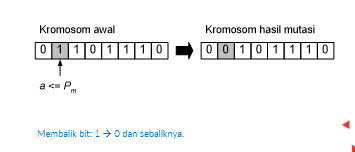

Mutation illustration

In [ ]:
#mutation by simple replacement, switching 0 to 1 and 1 to 0
def mutation(firstChild,secondChild):
  for i in range(len(firstChild)): #the mutation loop will occur for every genes in a chromosome
    r = random.random() #random number between 0 and 1
    if r < mutationProbability:
      if firstChild[i] == 1:
        firstChild[i] = 0
      else:
        firstChild[i] = 1
    
    r = random.random()
    if r < mutationProbability:
      if secondChild[i] == 1:
        secondChild[i] = 0
      else:
        secondChild[i] = 1
  
  return firstChild,secondChild

In [ ]:
def elitism(population,bestChromosomeGeneration,badChromosome,totalFitness):
  if bestChromosomeGeneration[1] > badChromosome[0] and (bestChromosomeGeneration[0] not in population):
    population[badChromosome[2]] = bestChromosomeGeneration[0]
    totalFitness = (totalFitness - badChromosome[0]) + bestChromosomeGeneration[1]

    print("\nElitism Process")
    print(f'Chromosome {badChromosome[2]+1}: {badChromosome[1]},with fitness value =: {badChromosome[0]}')
    print(f'changed to {bestChromosomeGeneration[0]},with fitness value = :{bestChromosomeGeneration[1]}\n')

  return population,totalFitness

In [ ]:
population = generatePopulation(individuTotal,chromosomeLength)
print("First Population: ",population)

bestChromosomeGeneration = []

for generationTotal in range(generation):
  #these will be reset for every generation
  chromosomeData, bestChromosome, badChromosome, fitnessData, newPopulation = [],[],[],[],[] 
  totalFitness,countChromosome,index = 0,99999,0

  print("\n==================================================")
  print("Generasi ke-",generationTotal+1)
  print("==================================================") #
  for i,chromosome in enumerate(population):
    genotypeA,genotypeB = splitChromosome(chromosome)
    x1 = decode(genotypeA,limitX)
    x2 = decode(genotypeB,limitY)
    
    fitnessValue = fitnessFunction(x1,x2) 
#this list will store every fitness value of a generation
    fitnessData.append(fitnessValue) 
#this variable will store total fitness of a generation. This variable will be used in parent selection
    totalFitness += fitnessValue 

    #find the smallest fitness value from a generation (the most bad chromosome)
    if generationTotal != 0 and fitnessValue < countChromosome:
      countChromosome = fitnessValue
      badChromosome = [fitnessValue,chromosome,i]
    
  #selecting the best chromosome
  bestChromosome = bestChromosomeSelection(population)

  print("Best Chromosome      : ", bestChromosome[0])
  print("Best Fitness         : ", bestChromosome[1])
  print("Best value x         : ", bestChromosome[2])
  print("Best value y         : ", bestChromosome[3])
  print("Best value function h: ", h(bestChromosome[2],bestChromosome[3]))

  #elitism
  if generationTotal != 0:
    mostBest = sorted(bestChromosomeGeneration,key=lambda x:x[1],reverse=True)[0]
    population,totalFitness = elitism(population,mostBest,badChromosome,totalFitness)
  
  #best after elitism
  if bestChromosome[1] <  bestChromosomeSelection(population)[1]:
    bestChromosome = bestChromosomeSelection(population)
    print("Best Chromosome      : ", bestChromosome[0])
    print("Best Fitness         : ", bestChromosome[1])
    print("Best value x         : ", bestChromosome[2])
    print("Best value y         : ", bestChromosome[3])
    print("Best value function h: ", h(bestChromosome[2],bestChromosome[3]))


  #best chromosome for all generation  
  bestChromosomeGeneration.append(bestChromosome)

  #looping for parent selection, recombination, and mutation
  if generationTotal != generation-1:
    for i in range(individuTotal // 2):
      #firstParent = parentRouletteWheel(population,fitnessData,totalFitness)
      #secondParent = parentRouletteWheel(population,fitnessData,totalFitness)
      firstParent = parentStochasticRouletteWheel(population,bestChromosome[1])
      secondParent = parentStochasticRouletteWheel(population,bestChromosome[1])
      while (firstParent == secondParent):
        secondParent = parentStochasticRouletteWheel(population,bestChromosome[1])
      firstChild,secondChild = recombination(firstParent,secondParent)
      firstChild,secondChild = mutation(firstChild,secondChild)
      newPopulation.append(firstChild)
      newPopulation.append(secondChild)

    population = newPopulation
print("\n===================================")
print("Best Chromosome      : ", mostBest[0])
print("Best Fitness         : ", mostBest[1])
print("Best value x         : ", mostBest[2])
print("Best value y         : ", mostBest[3])
print("Best value function h: ", h(mostBest[2],mostBest[3]))
print("===================================")

First Population:  [[1, 0, 1, 1, 1, 1, 1, 0, 0, 1], [0, 1, 1, 1, 1, 0, 1, 1, 0, 0], [0, 0, 1, 0, 0, 1, 1, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0, 1, 0, 1], [0, 1, 1, 0, 0, 0, 1, 0, 1, 0], [1, 0, 0, 1, 1, 1, 0, 0, 1, 0], [1, 0, 1, 1, 1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 1, 0, 1, 1, 0, 0]]

Generasi ke- 1
Best Chromosome      :  [0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
Best Fitness         :  475.9355799725695
Best value x         :  -3.709677419354839
Best value y         :  1.774193548387097
Best value function h:  0.0011011246943496745

Generasi ke- 2
Best Chromosome      :  [0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
Best Fitness         :  801.2814543899267
Best value x         :  -3.709677419354839
Best value y         :  1.129032258064516
Best value function h:  0.0002480009296625641

Generasi ke- 3
Best Chromosome      :  [0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
Best Fitness         :  994.0293013466509
Best value x         :  -3.3870967741935485
Best value y   

In [ ]:
print(h(-5.0,3.387096774193548))

4.523215875213339e-05


In [ ]:
print(h(2.741935483870968,3.387096774193548))

0.07137488239232116


In [ ]:
print(h(-3.064516129032258,-4.67741935483871))

1.777463712212467e-07


In [ ]:
#test
firstGenotype,secondGenotype = splitChromosome([1, 1, 0, 0, 1, 0, 0, 0, 0, 1])
x1,x2 = decode(firstGenotype,limitX), decode(secondGenotype,limitY)
print(x1,x2)
print(fitnessFunction(x1,x2))
print(h(x1,x2))



3.064516129032258 -4.67741935483871
999.8222852169366
1.777463712212467e-07
